In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM_copy import TwoCUM

In [2]:
testx = np.load('trained_models/data/test_x.npy')
testy = np.load('trained_models/data/test_y.npy')
AIF = np.load("data/AIF.npy")


testx.shape

(76254, 150)

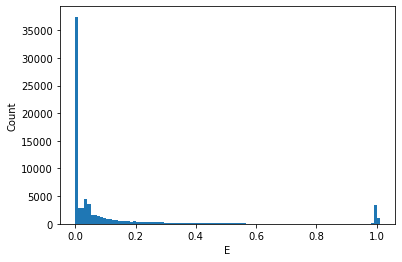

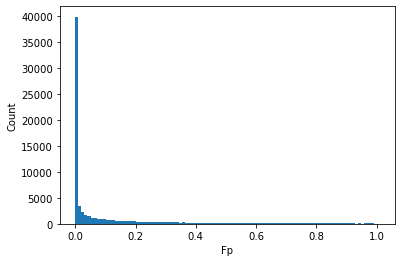

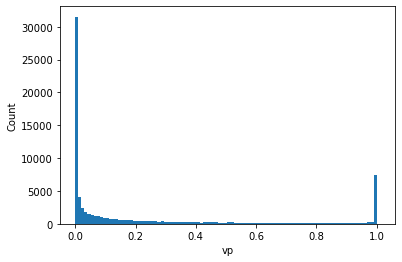

<Figure size 432x288 with 0 Axes>

In [3]:
plt.hist(testy[:,0],range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/E_full.png')

plt.show()
plt.clf()

plt.hist(100*testy[:,1],range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/Fp_full.png')

plt.show()
plt.clf()

plt.hist(testy[:,2],range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/vp_full.png')

plt.show()
plt.clf()

In [4]:
#testing out the everything less than condition and seeing what it looks like
#decided it wasn't the best and there were better ways of getting rid of outliers
filter_y = testy[(testy[:,0] < 0.02) & (testy[:,1] < 0.01) & (testy[:,2] < 0.02)]

ylist = []
xlist = []
for i,row in enumerate(testy):
    if np.all(row == filter_y, axis = 1).sum() == 0:
        ylist.append(testy[i])
        xlist.append(testx[i])

xlist = np.array(xlist)
ylist = np.array(ylist)
xlist.shape, ylist.shape, filter_y.shape, testy.shape, testy.shape[0] - filter_y.shape[0]

((48518, 150), (48518, 3), (27736, 3), (76254, 3), 48518)

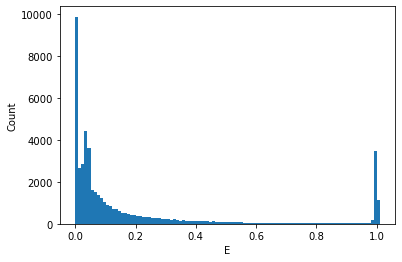

144.0000000000003

<Figure size 432x288 with 0 Axes>

In [26]:
E = ylist[:,0]
Fp = ylist[:,1]
vp = ylist[:,2]

fig, ax = plt.subplots()

hist = ax.hist(E,range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.show()
plt.clf()

# plt.hist(100*Fp,range=[0, 1.01], bins = 100)
# plt.xlabel('Fp')
# plt.ylabel('Count')
# plt.show()
# plt.clf()

# plt.hist(vp,range=[0, 1.01], bins = 100)
# plt.xlabel('vp')
# plt.ylabel('Count')
# plt.show()
# plt.clf()

count = np.array(hist[0])
count1 = count +1.2
res = (count - count1)**2
res_E = res.sum()
res_E

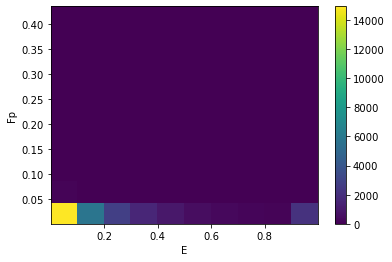

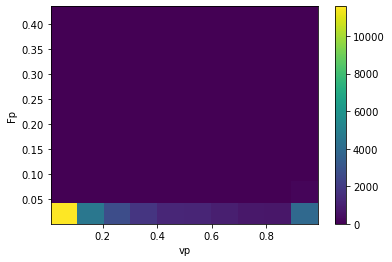

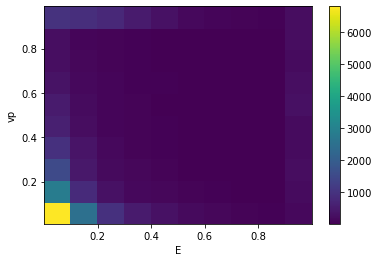

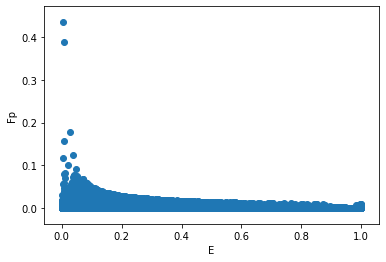

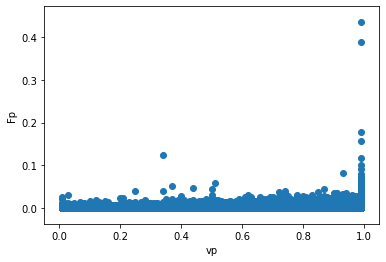

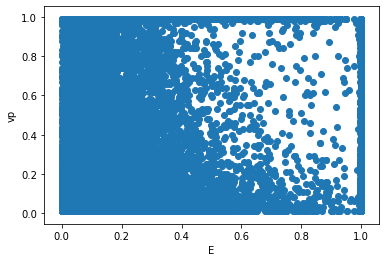

<Figure size 432x288 with 0 Axes>

In [53]:


plt.hist2d(E, Fp, bins = 10)
plt.xlabel('E')
plt.ylabel('Fp')
plt.colorbar()
plt.show()
plt.clf()

plt.hist2d(vp, Fp, bins = 10)
plt.xlabel('vp')
plt.ylabel('Fp')
plt.colorbar()
plt.show()
plt.clf()

plt.hist2d(E, vp, bins = 10)
plt.xlabel('E')
plt.ylabel('vp')
plt.colorbar()
plt.show()
plt.clf()

plt.scatter(E, Fp)
plt.xlabel('E')
plt.ylabel('Fp')
plt.show()
plt.clf()

plt.scatter(vp, Fp)
plt.xlabel('vp')
plt.ylabel('Fp')
plt.show()
plt.clf()

plt.scatter(E, vp)
plt.xlabel('E')
plt.ylabel('vp')
plt.show()
plt.clf()

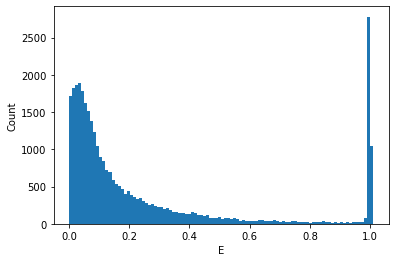

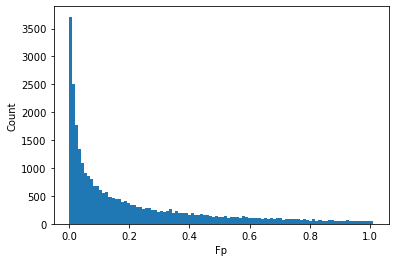

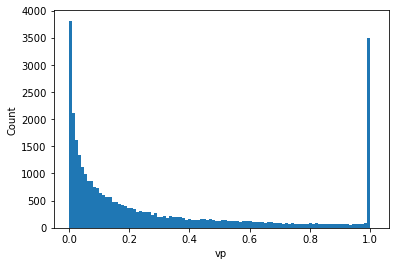

<Figure size 432x288 with 0 Axes>

In [7]:
#this gives weirdly smooth distributions
filter_y1 = testy[(testy[:,0] > 0.001) & (testy[:,1] > 0.00003) & (testy[:,2] > 0.001)]

E = filter_y1[:,0]
Fp = filter_y1[:,1]
vp = filter_y1[:,2]


plt.hist(E,range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/E_greater.png')

plt.show()
plt.clf()

plt.hist(100*Fp,range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/fp_greater.png')

plt.show()
plt.clf()

plt.hist(vp,range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/vp_greater.png')

plt.show()
plt.clf()

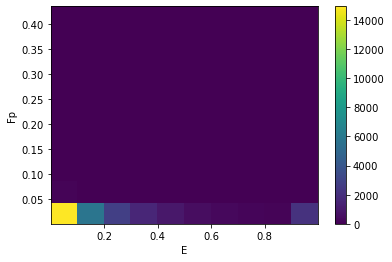

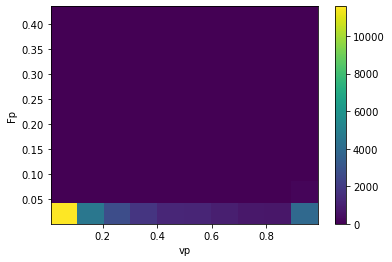

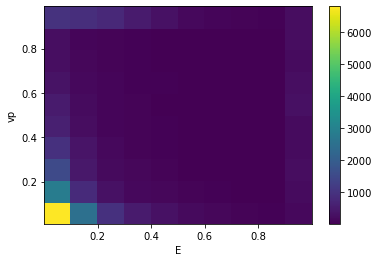

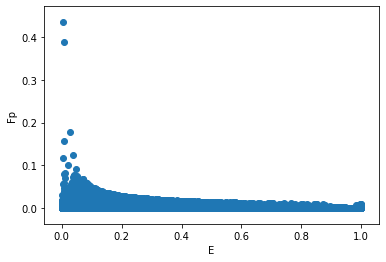

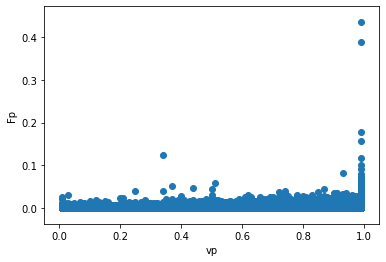

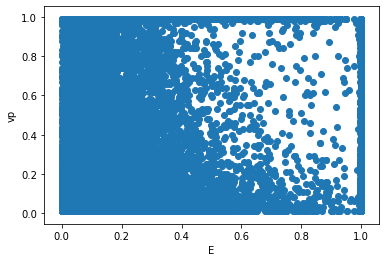

<Figure size 432x288 with 0 Axes>

In [55]:


plt.hist2d(E, Fp, bins = 10)
plt.xlabel('E')
plt.ylabel('Fp')
plt.colorbar()
plt.show()
plt.clf()

plt.hist2d(vp, Fp, bins = 10)
plt.xlabel('vp')
plt.ylabel('Fp')
plt.colorbar()
plt.show()
plt.clf()

plt.hist2d(E, vp, bins = 10)
plt.xlabel('E')
plt.ylabel('vp')
plt.colorbar()
plt.show()
plt.clf()

plt.scatter(E, Fp)
plt.xlabel('E')
plt.ylabel('Fp')
plt.show()
plt.clf()

plt.scatter(vp, Fp)
plt.xlabel('vp')
plt.ylabel('Fp')
plt.show()
plt.clf()

plt.scatter(E, vp)
plt.xlabel('E')
plt.ylabel('vp')
plt.show()
plt.clf()

(33655, 3)


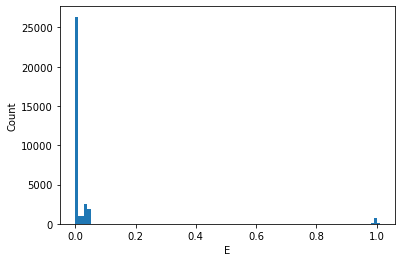

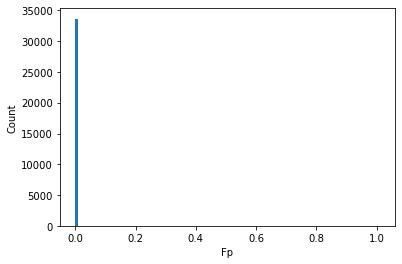

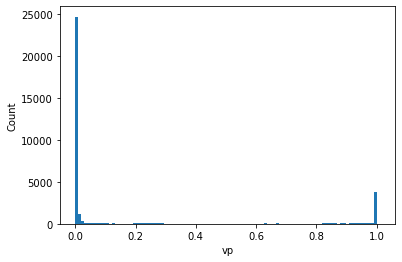

<Figure size 432x288 with 0 Axes>

In [61]:
fp_y = testy[testy[:,1] < 0.00003]
print(fp_y.shape)

E = fp_y[:,0]
Fp = fp_y[:,1]
vp = fp_y[:,2]


plt.hist(E,range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/E_fp_00003.png')

plt.show()
plt.clf()

plt.hist(100*Fp,range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/Fp_fp_00003.png')

plt.show()
plt.clf()

plt.hist(vp,range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.savefig('plots/23_02_22/vp_fp_00003.png')

plt.show()
plt.clf()

(4575, 150)
[3.87796319e-02 3.09809063e-06 9.90000000e-01]


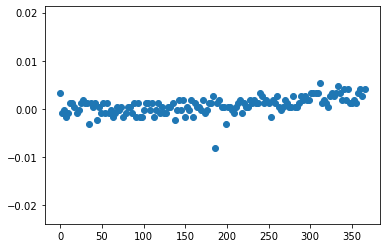

In [85]:
fp_x = testx[(testy[:,1] < 0.00003) & (testy[:,2] > 0.9)]
fp_y = testy[(testy[:,1] < 0.00003) & (testy[:,2] > 0.9)]

print(fp_x.shape)
t = np.arange(0,366,2.45)
i = 1129
plt.scatter(t, fp_x[i])
print(fp_y[i])

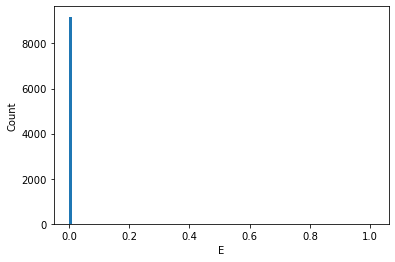

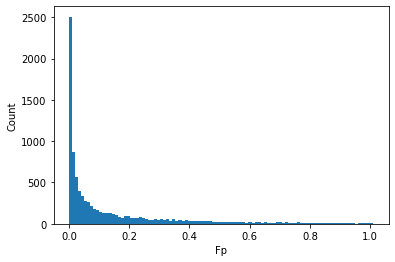

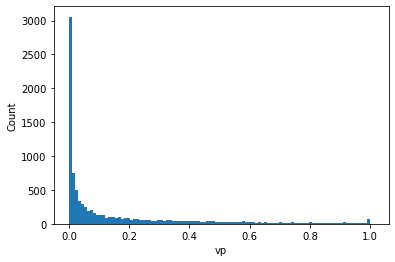

<Figure size 432x288 with 0 Axes>

In [11]:
E_y = testy[(testy[:,0] < 0.0001) & (testy[:,1] > 0.00003)]
E_x = testx[(testy[:,0] < 0.0001) & (testy[:,1] > 0.00003)]


E = E_y[:,0]
Fp = E_y[:,1]
vp = E_y[:,2]


plt.hist(E,range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(100*Fp,range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(vp,range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.show()
plt.clf()

(3575, 150)
[0.16301522 0.01199656 0.99      ]


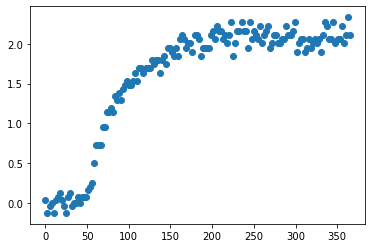

In [103]:
print(E_x.shape)
t = np.arange(0,366,2.45)
i = 1
plt.scatter(t, E_x[i])
print(E_y[i])

(6878, 3)


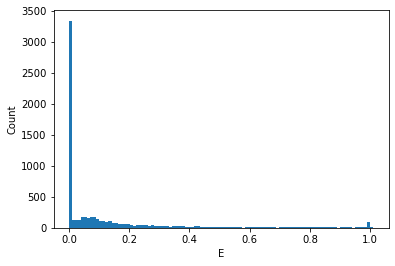

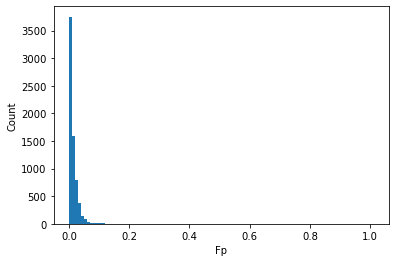

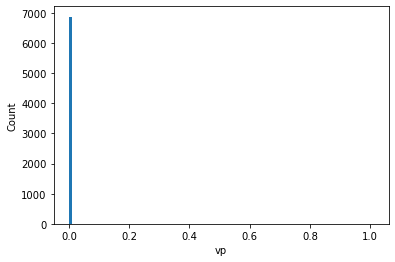

<Figure size 432x288 with 0 Axes>

In [30]:
vp_y = testy[(testy[:,2] < 0.01001) & (testy[:,1] > 0.00003)]
vp_x = testx[(testy[:,2] < 0.02) & (testy[:,1] > 0.00003)]
print(vp_y.shape)

E = vp_y[:,0]
Fp = vp_y[:,1]
vp = vp_y[:,2]


plt.hist(E,range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(100*Fp,range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(vp,range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.show()
plt.clf()

(6878, 3)


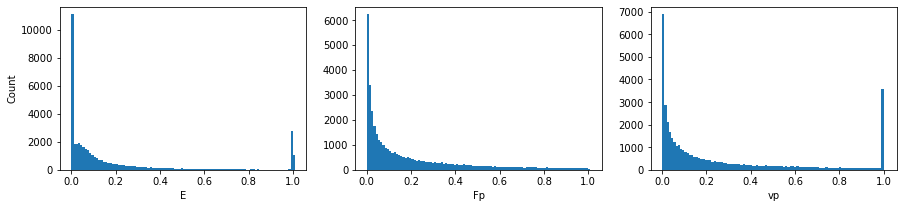

<Figure size 432x288 with 0 Axes>

In [78]:
E_vp_y = testy[(testy[:,1] > 0.00003)]
print(vp_y.shape)

E = E_vp_y[:,0]
Fp = E_vp_y[:,1]
vp = E_vp_y[:,2]

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].hist(E,range=[0, 1.01], bins = 100)
axs[0].set_xlabel('E')
axs[0].set_ylabel('Count')


axs[1].hist(100*Fp,range=[0, 1.01], bins = 100)
axs[1].set_xlabel('Fp')


axs[2].hist(vp,range=[0, 1.01], bins = 100)
axs[2].set_xlabel('vp')

plt.savefig('plots/23_02_22/New_data_dist.png')
plt.show()
plt.clf()

(42599, 3)


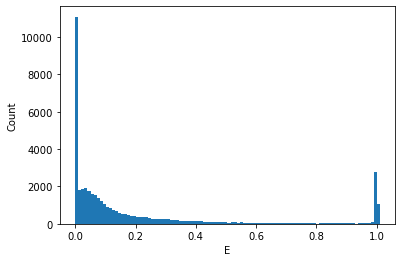

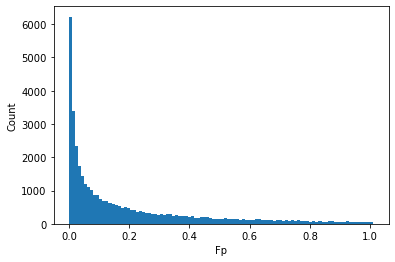

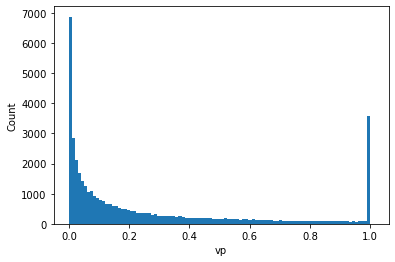

(42599, 150)


<Figure size 432x288 with 0 Axes>

In [60]:
new_y = testy[(testy[:,1] > 0.00003)]
new_x = testx[(testy[:,1] > 0.00003)]

print(new_y.shape)

E = new_y[:,0]
Fp = new_y[:,1]
vp = new_y[:,2]


plt.hist(E,range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(100*Fp,range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(vp,range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.show()
plt.clf()

print(new_x.shape)


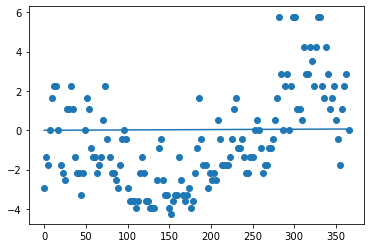

[9.98234221e-01 1.04831255e-04 1.40000000e-01]


In [85]:
t = np.arange(0,366,2.45)
i = 18844

plotted = TwoCUM(new_y[i], t, AIF, 0)
plt.scatter(t, new_x[i])
plt.plot(t, plotted)
plt.show()
print(new_y[i])

(42599, 150)

In [86]:
np.save('trained_models/data/real_x_cleaned.npy', new_x)
np.save('trained_models/data/real_y_cleaned.npy', new_y)

In [95]:
a = new_x[:100]
b = new_x[:100]
print(a.shape, b.shape)
c = np.concatenate((a, b), axis = 0)
c.shape

(100, 150) (100, 150)


(200, 150)